# <font color=blue>Assignments for "Data Cleaning - Outliers"</font>

In this assignment, you continue to study the data of the `US Education System`. Again, please down it from here ([dataset](https://www.kaggle.com/noriuk/us-education-datasets-unification-project/home)). In this dataset, there is a lot of data on an annual basis. You can reach the explanations of this data from Kaggle again.

First of all, apply the most appropriate one of the techniques for completing the missing values in your previous lesson. In order to answer the following questions, you must overcome the missing data.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('states_all.csv')
df

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1715 non-null   object 
 1   STATE                         1715 non-null   object 
 2   YEAR                          1715 non-null   int64  
 3   ENROLL                        1224 non-null   float64
 4   TOTAL_REVENUE                 1275 non-null   float64
 5   FEDERAL_REVENUE               1275 non-null   float64
 6   STATE_REVENUE                 1275 non-null   float64
 7   LOCAL_REVENUE                 1275 non-null   float64
 8   TOTAL_EXPENDITURE             1275 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1275 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1275 non-null   float64
 11  OTHER_EXPENDITURE             1224 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1275 non-null   float64
 13  GRA

**(1)** See `TOTAL_REVENUE`, which includes total revenue data, and `TOTAL_EXPENDITURE`, which includes total spending data. Do these variables contain outliers?

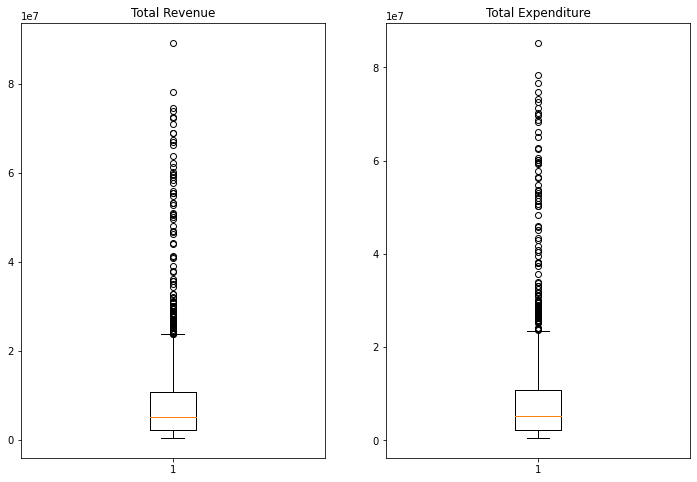

In [ ]:
plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
plt.boxplot(df.TOTAL_REVENUE.dropna())
plt.title('Total Revenue')

plt.subplot(1,2,2)
plt.boxplot(df.TOTAL_EXPENDITURE.dropna())
plt.title('Total Expenditure')

plt.show()

By using boxplot, we've seen that there are outliers in both data.
Let us use histogram chart this time.

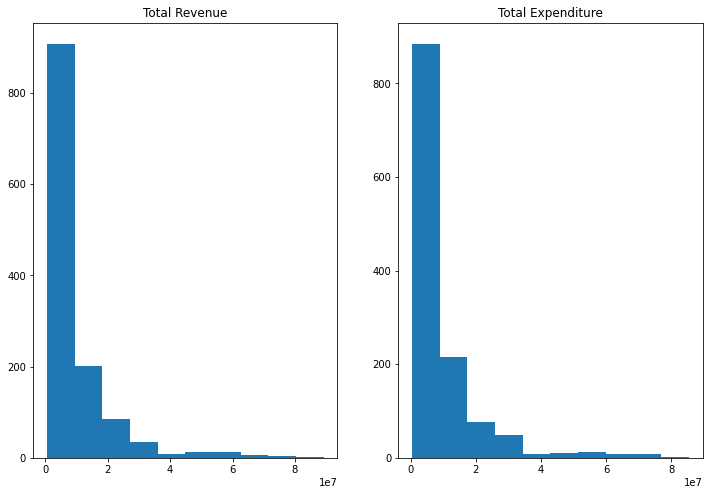

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.hist(df.TOTAL_REVENUE.dropna())
plt.title('Total Revenue')

plt.subplot(1,2,2)
plt.hist(df.TOTAL_EXPENDITURE.dropna())
plt.title('Total Expenditure')

plt.show()

In [ ]:
from scipy.stats import zscore

z_scores = zscore(df['TOTAL_REVENUE'].dropna())
for threshold in range(1,5):
    print("Threshold value: {}".format(threshold))
    print("Number of Outliers: {}".format(len((np.where(z_scores > threshold)[0]))))
    print('------')

Threshold value: 1
Number of Outliers: 134
------
Threshold value: 2
Number of Outliers: 52
------
Threshold value: 3
Number of Outliers: 37
------
Threshold value: 4
Number of Outliers: 21
------


**(2)** If you find outliers in the total income `TOTAL_REVENUE` and total expenditure `TOTAL_EXPENDITURE` variables, eliminate these outliers by applying the techniques you learned in this lesson and verify that no outliers remain after doing this.

In [ ]:
from scipy.stats.mstats import winsorize

winsorizing1 = winsorize(np.array(df.TOTAL_REVENUE.dropna()), (0.10, 0.15))
winsorizing1

masked_array(data=[ 2678885.,  1200186.,  3258079., ...,  3391579.,
                   11697466.,  2044669.],
             mask=False,
       fill_value=1e+20)

In [ ]:
from scipy.stats.mstats import winsorize

winsorizing2 = winsorize(np.array(df.TOTAL_EXPENDITURE.dropna()), (0.10, 0.15))
winsorizing2

masked_array(data=[ 2653798.,  1228869.,  3401580., ...,  3366566.,
                   11787535.,  2034229.],
             mask=False,
       fill_value=1e+20)

In [ ]:
np.percentile(df.TOTAL_REVENUE.dropna(),[10,90])

array([ 1202352.4, 21627676.6])

In [ ]:
np.percentile(df.TOTAL_EXPENDITURE.dropna(),[10,90])

array([ 1229941.4       , 21929150.40000001])

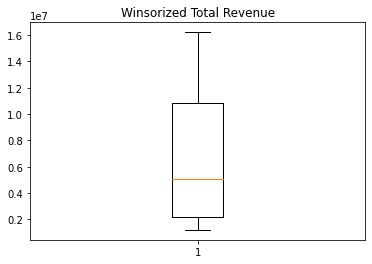

In [ ]:
plt.title('Winsorized Total Revenue')
plt.boxplot(winsorizing1)
plt.show()

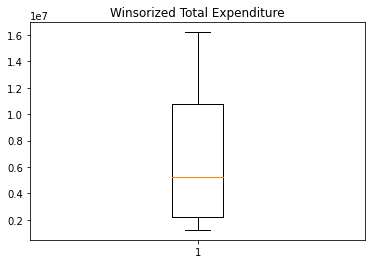

In [ ]:
plt.boxplot(winsorizing2)
plt.title('Winsorized Total Expenditure')
plt.show()

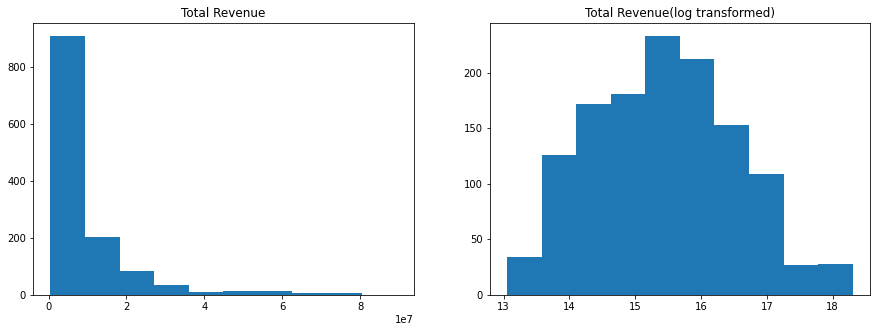

In [ ]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(df['TOTAL_REVENUE'].dropna())
plt.title('Total Revenue')

plt.subplot(1,2,2)
plt.hist(np.log(df['TOTAL_REVENUE'].dropna()))
plt.title("Total Revenue(log transformed)")
plt.show()

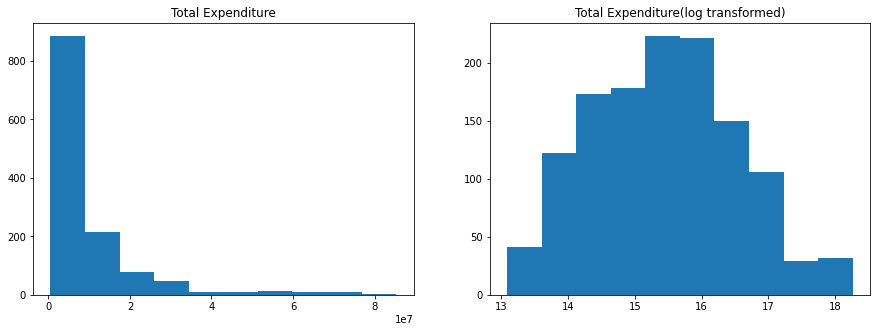

In [ ]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(df['TOTAL_EXPENDITURE'].dropna())
plt.title('Total Expenditure')

plt.subplot(1,2,2)
plt.hist(np.log(df['TOTAL_EXPENDITURE'].dropna()))
plt.title("Total Expenditure(log transformed)")
plt.show()

**(3)** Subtract the total expenditure `TOTAL_EXPENDITURE` from the total income variable `TOTAL_REVENUE` to create a variable that can be considered as a budget deficit (without failing to contradict the outliers). Are there any outliers in this new variable? If any, clear these outliers.

In [ ]:
budget_deficit = []

for value in range(0,1714):
  budget_deficit.append( df.TOTAL_REVENUE[value] - df.TOTAL_EXPENDITURE[value] )


budget_deficit = pd.DataFrame(budget_deficit)
budget_deficit.columns = ['BUDGET_DEFICIT']
budget_deficit.head()

,BUDGET_DEFICIT
0,25087.0
1,77103.0
2,-143501.0
3,-31063.0
4,-878807.0


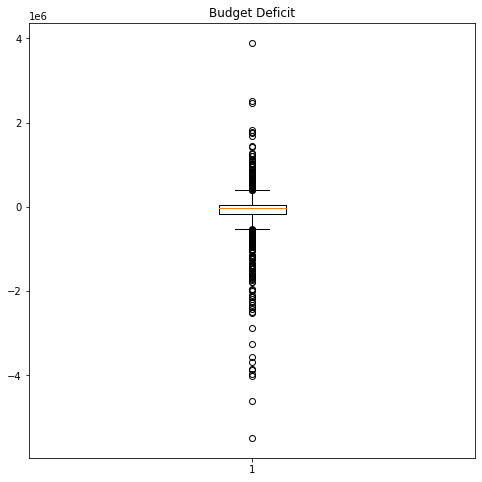

In [ ]:
plt.figure(figsize= (8,8))
plt.boxplot(budget_deficit.BUDGET_DEFICIT.dropna())
plt.title('Budget Deficit')
plt.show()

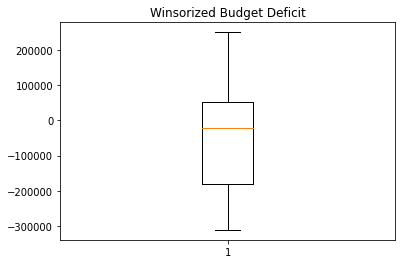

In [ ]:
winsorized_budget_deficit = winsorize(np.array(budget_deficit.BUDGET_DEFICIT.dropna()), (0.15, 0.10))

plt.boxplot(winsorized_budget_deficit)
plt.title('Winsorized Budget Deficit')
plt.show()

**(4)** Again create a variable that can be considered as a budget deficit by subtracting the total income `TOTAL_REVENUE` variable from the total expenditure `TOTAL_EXPENDITURE`. But this time, after clearing the outliers, do this. Are there any outliers in this new variable? It is useful to clean them, if any.

In [ ]:
df.TOTAL_REVENUE.dropna()
df.TOTAL_EXPENDITURE.dropna()

0        2653798.0
1         972488.0
2        3401580.0
3        1743022.0
4       27138832.0
           ...    
1270    16497520.0
1271    15253296.0
1272     3366566.0
1273    11787535.0
1274     2034229.0
Name: TOTAL_EXPENDITURE, Length: 1275, dtype: float64

In [ ]:
budget_deficit_2 = []

for value in range(0,1274):
  budget_deficit_2.append( df.TOTAL_REVENUE[value] - df.TOTAL_EXPENDITURE[value] )


budget_deficit_2 = pd.DataFrame(budget_deficit_2)
budget_deficit_2.columns = ['NEW_DEFICIT']
budget_deficit_2.head()

,NEW_DEFICIT
0,25087.0
1,77103.0
2,-143501.0
3,-31063.0
4,-878807.0


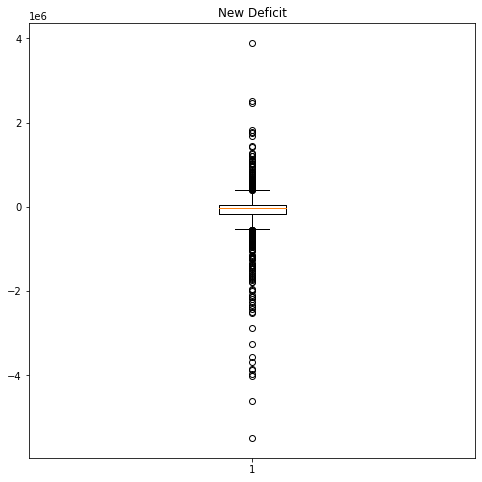

In [ ]:
plt.figure(figsize=(8,8))
plt.boxplot(budget_deficit_2.NEW_DEFICIT)
plt.title('New Deficit')
plt.show()

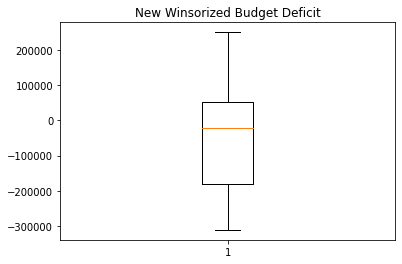

In [ ]:
new_winsorized_budget_deficit = winsorize(np.array(budget_deficit_2.NEW_DEFICIT.dropna()), (0.15, 0.10))

plt.boxplot(new_winsorized_budget_deficit)
plt.title('New Winsorized Budget Deficit')
plt.show()

**(5)** Now, we have two different budget variables that we have created in the third and fourth questions. Do you see the difference between these two?

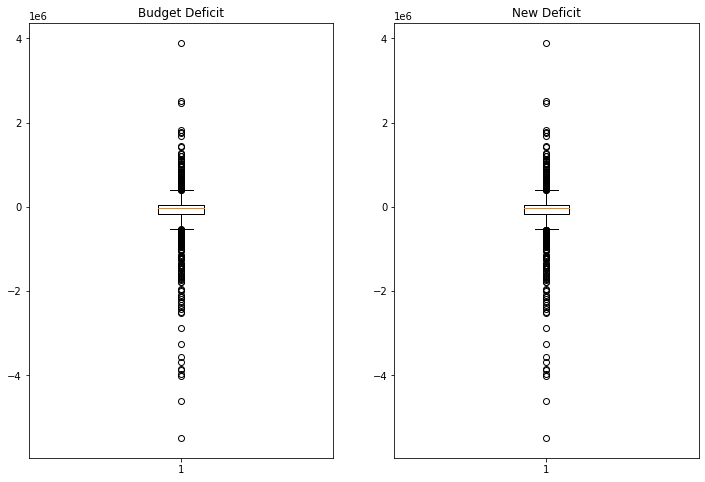

In [ ]:
plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
plt.boxplot(budget_deficit.BUDGET_DEFICIT.dropna())
plt.title('Budget Deficit')

plt.subplot(1,2,2)
plt.boxplot(budget_deficit_2.NEW_DEFICIT)
plt.title('New Deficit')

plt.show()

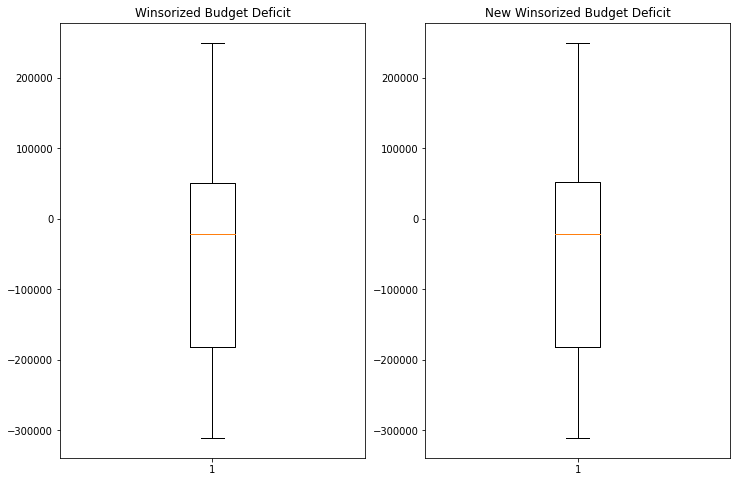

In [ ]:
plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
plt.boxplot(winsorized_budget_deficit)
plt.title('Winsorized Budget Deficit')

plt.subplot(1,2,2)
plt.boxplot(new_winsorized_budget_deficit)
plt.title('New Winsorized Budget Deficit')

plt.show()

**I compared both the main and winsorized versions of what I've been given, but I couldn't see any difference. Actually, I thought there would be a difference. In my opinion, it is due to the my humanly-observations or techniques are not sufficient to observe what to get the difference.**

**(6)** If the budget deficit was a very important variable for us, which method would be better to clear out contrary values. Is it the method you applied in the third question or the method in the fourth question?

In [ ]:
"""
If I could've seen the difference, I'd have pick an option.
Anyway, my mind tells me that it is better to deal with the data AFTER dealing
with the missing values first.
"""